<a href="https://colab.research.google.com/github/byui-cse/cse480-notebooks/blob/master/08_3_Answer_Selected_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Answer Selected Questions
## 26 February 2021

## 1

We're studying the very-low-level Turing Machine model, and also a higher-level but still primitive model in The Simple Language with its ```incr```, ```decr```, and ```while``` instructions. Is there a model that lies somewhere in-between these two?



### Answer

Yes. There is an intermediate model sort of halfway between a Turing Machine and The Simple Language.

It's called a [Register Machine](https://en.wikipedia.org/wiki/Register_machine), of which the following is an interesting example:

#### Excerpt from a Talk

by Guy L. Steele Jr. called [Growing a Language](http://www.cs.virginia.edu/~evans/cs655/readings/steele.pdf).

Think of a machine that can keep track of two numbers, and count each one up or down, and test if a number be nought and by such a test choose to do this or that. The list of things that it can do and of choices that it can make must be of a known size that is some number.

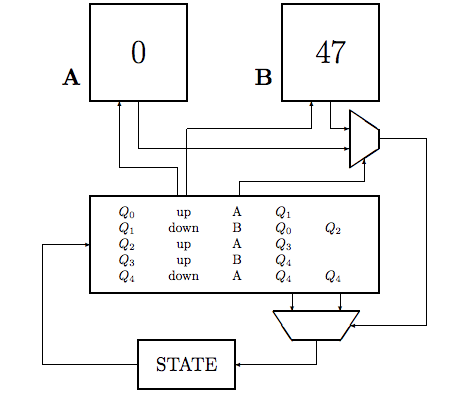


Here you can see the two numbers and a list. The machine starts its work with the first row of the list. Each row in the list has a state name; the word ```up``` or ```down```; and which number to count up or count down. For ```up```, we have the name of the next state to go to (and the machine counts the number up by one); for ```down```, the machine first tests the number, and so we have the name of the new state to go to if the number be nought and the name of the new state to go to if the number be other than nought (in which case the machine counts the number down by one).

Note that no two rows of the list have the same state name.

A computer is a machine that can do at least what the two number machine can do --- and we have good cause to think that if a computer task can be done at all, then the two number machine can do it, too, if you put numbers in and read them out in the right way. In some sense, all computers are the same; we know this thanks to the work of such persons as Alan Turing and Alonzo Church. [...]

To program is to make up a list of things to do and choices to make, to be done by a computer. Such a list is called a program.

#### Implementation

The code below implements the above program:

In [9]:
def transition(current_state):
  global A, B
  if current_state == 'Q0':
    A += 1
    return 'Q1'
  elif current_state == 'Q1':
    if B == 0:
      return 'Q0'
    else:
      B -= 1
      return 'Q2'
  elif current_state == 'Q2':
    A += 1
    return 'Q3'
  elif current_state == 'Q3':
    B += 1
    return 'Q4'
  elif current_state == 'Q4':
    if A > 0:
      A -= 1
    return 'Q4'
  else:
    raise ValueError('no such state')

##### Now to run it for a few steps

In [11]:
A = 0
B = 47
CS = 'Q0'
print('# CS A B\n---------')
print(0, CS, A, B)
for n in range(1, 8):
  CS = transition(CS)
  print(n, CS, A, B)

# CS A B
---------
0 Q0 0 47
1 Q1 1 47
2 Q2 1 46
3 Q3 2 46
4 Q4 2 47
5 Q4 1 47
6 Q4 0 47
7 Q4 0 47


##### Comments

Not a very interesting program. It increments A from 0 to 2 and decrements it back to zero. B is decremented to 46 then incremented back to 47. The net effect is to not change the values at all. If Q4 was meant to be a halt state, then because the machine is stuck there and will keep executing that step forever, this is a "buggy" (and non-halting) program. I'm not sure that is what Steele intended!